## 作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。
* Q1: 透過數值法計算  Age 和  Survived  是否有相關性?
* Q2:透過數值法計算  Sex 和 Survived  是否有相關性?
* Q3: 透過數值法計算  Age 和  Fare 是否有相關性?   
* 提示:    
1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態      
2.把題目中的 Survived 用 Survived_cate 來做分析       
3.首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。     


In [3]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import statistics
import seaborn as sns
import pingouin as pg
import researchpy
from scipy import stats
from IPython.display import display
%matplotlib inline

## 讀入資料

In [34]:

# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import statistics
import seaborn as sns
import pingouin as pg
import researchpy
from scipy import stats
from IPython.display import display

%matplotlib inline

#讀入資料
df = pd.read_csv("Titanic_train.csv")

#產生新的一組資料型態
df1=df[['Survived','Sex','Age','Pclass','Fare']]
# Using inplace to change the origin data
df1["Sex"].replace("male", 0, inplace = True) # 將"male"換成數值0 
df1["Sex"].replace("female", 1, inplace = True) # 將"female"換成數值1

# 刪除有遺失值的列
df1.dropna(inplace=True)

## 這邊我們做一個調整，把 Survived 變成離散型變數 Survived_cate
Survived_cate=df1.corr()
print(Survived_cate)

          Survived       Sex       Age    Pclass      Fare
Survived  1.000000  0.538826 -0.077221 -0.359653  0.268189
Sex       0.538826  1.000000 -0.093254 -0.155460  0.184994
Age      -0.077221 -0.093254  1.000000 -0.369226  0.096067
Pclass   -0.359653 -0.155460 -0.369226  1.000000 -0.554182
Fare      0.268189  0.184994  0.096067 -0.554182  1.000000


C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-34-c5a48414f49c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


###  Q1: 透過數值法計算  Age 和  Survived  是否有相關性?


-0.17901531293692402


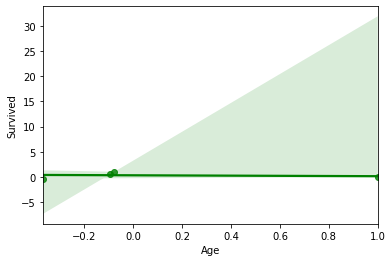

In [29]:
# 由於 pearsonr 有兩個回傳結果，我們只需取第一個回傳值為相關係數
corr, _=stats.pearsonr(Survived_cate['Survived'], Survived_cate['Age'])
print(corr)
#代表年齡和生存率不具有高度線性相關

g = sns.regplot(x="Age", y="Survived", color="g",data=Survived_cate)
#年齡和生存率關係不大

### Q2:透過數值法計算  Sex 和 Survived  是否有相關性?


0.7784441135190632


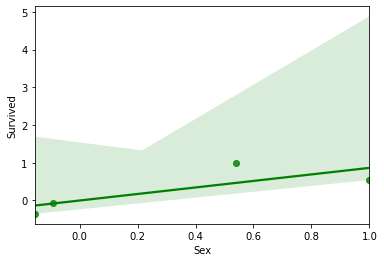

In [30]:
# 由於 pearsonr 有兩個回傳結果，我們只需取第一個回傳值為相關係數
corr, _=stats.pearsonr(Survived_cate['Survived'], Survived_cate['Sex'])
print(corr)
#代表性別和生存率具有線性相關

g = sns.regplot(x="Sex", y="Survived", color="g",data=Survived_cate)
#年齡和性別生存率關係大，因為當時女性與小孩優先的策略，造成女性和小孩的生存率比較高

### Q3: 透過數值法計算  Age 和  Fare 是否有相關性?  

0.2139110580489052


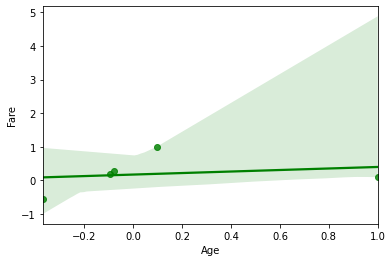

In [33]:
# 由於 pearsonr 有兩個回傳結果，我們只需取第一個回傳值為相關係數
corr, _=stats.pearsonr(Survived_cate['Age'], Survived_cate['Fare'])
print(corr)
#代表年齡和費用的線性關係並不顯著

g = sns.regplot(x="Age", y="Fare", color="g",data=Survived_cate)
#年齡和費用之間的關聯性並不大